# SVM SUPPORT VECTOR MACHINE MACHINE LEARING ALGORITHM 


In [1]:
import pandas as pd  
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_classification


In [3]:
x,y = make_classification(n_samples = 1000,n_features = 2, n_classes = 2 , n_clusters_per_class= 1 , n_redundant= 0)

In [4]:
pd.DataFrame(x)[0]

0     -0.104933
1      1.414992
2      0.664445
3      2.112372
4     -0.595223
         ...   
995    1.121727
996    1.532455
997    2.084300
998    0.310680
999    0.114074
Name: 0, Length: 1000, dtype: float64

In [5]:
plt.style.use('default')
sns.set_style("white")


<Axes: xlabel='0', ylabel='1'>

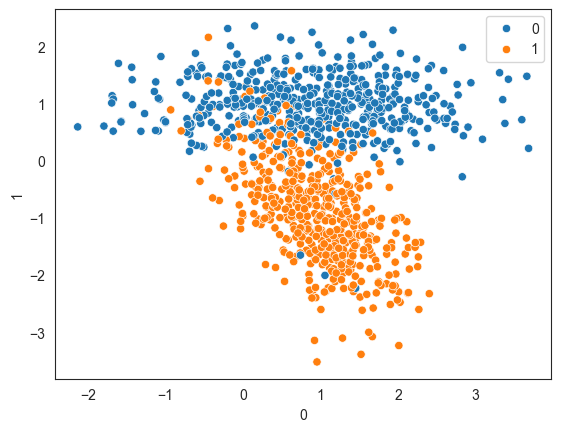

In [6]:
sns.scatterplot(x=pd.DataFrame(x)[0], 
                y=pd.DataFrame(x)[1],
                hue=y)


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')

In [9]:
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [10]:
y_pred = svc.predict(x_test)

In [11]:
from sklearn.metrics import accuracy_score ,confusion_matrix,classification_report
accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       112
           1       0.93      0.98      0.96        88

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200

[[106   6]
 [  2  86]]


In [12]:
rbf = SVC(kernel='rbf')
rbf.fit(x_train,y_train)


SVC()

In [13]:
y_pred1 = rbf.predict(x_test)


In [14]:
accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       112
           1       0.93      0.98      0.96        88

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200

[[106   6]
 [  2  86]]


In [15]:
poly = SVC(kernel='poly')
poly.fit(x_train,y_train)


SVC(kernel='poly')

In [16]:
y_pred1 = poly.predict(x_test)

In [17]:
accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       112
           1       0.93      0.98      0.96        88

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200

[[106   6]
 [  2  86]]


In [18]:
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(x_train,y_train)
y_pred =  sigmoid.predict(x_test)

accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))




              precision    recall  f1-score   support

           0       0.81      0.79      0.80       112
           1       0.74      0.77      0.76        88

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200

[[88 24]
 [20 68]]


# Hyperparametere Tuning With SVC

In [19]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100,1000],
              'gamma':[1,0.1,0.01,0.001,0.0001],
              'kernel':['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.956 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.869 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.894 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.956 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.938 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.956 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.869 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.938 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.919 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [20]:
grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [21]:
y_pred2 = grid.predict(x_test)

accuracy_score(y_test,y_pred2)
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       112
           1       0.95      0.98      0.96        88

    accuracy                           0.96       200
   macro avg       0.96      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200

[[107   5]
 [  2  86]]


# SVM kernel indepth intuition and pratical Explanation 

In [22]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
x = np.linspace(-5.0,5.0,100)
y = np.sqrt(10**2 - x**2)
y = np.hstack([y,-y])
x = np.hstack([x,-x])

In [23]:
x1 = np.linspace(-5.0,5.0,100)
y1 = np.sqrt(5**2 - x1**2)
y1 = np.hstack([y1,-y1])
x1 = np.hstack([x1,-x1])



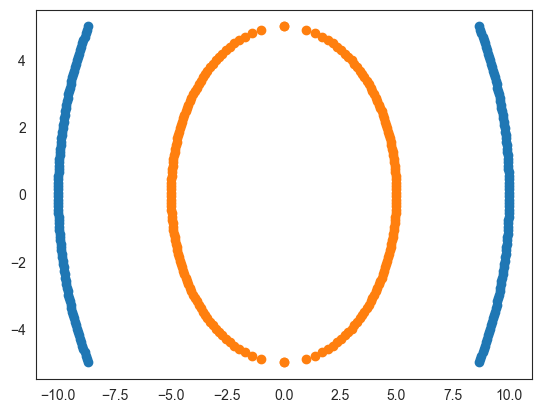

In [24]:
plt.scatter(y,x)
plt.scatter(y1,x1)


In [25]:
df1 = pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y'] = 0

df2 = pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y'] = 1
df = pd.concat([df1,df2])
df.head()

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


## Independent or Dependent features

In [26]:
x = df.iloc[:, :2]
y = df.Y

In [27]:
y


0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: Y, Length: 400, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# we need to find compoenents for the polynomial Kernal

In [29]:
df['X1_Square'] = df['X1']**2
df['X2_Square'] = df['X2']**2
df['X1*X2'] = (df['X1'] * df['X2'])
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [30]:
x =df[['X1','X2','X1_Square','X2_Square','X1*X2']]
y = df['Y']

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
x_train

,X1,X2,X1_Square,X2_Square,X1*X2
3,8.828277,-4.696970,77.938476,22.061524,-41.466150
18,9.480297,-3.181818,89.876033,10.123967,-30.164582
2,1.406908,-4.797980,1.979390,23.020610,-6.750316
50,4.999745,0.050505,24.997449,0.002551,0.252512
74,4.344609,2.474747,18.875625,6.124375,10.751809
...,...,...,...,...,...
71,9.761334,2.171717,95.283645,4.716355,21.198857
106,-8.982945,4.393939,80.693297,19.306703,-39.470515
70,4.551063,2.070707,20.712172,4.287828,9.423918
148,-4.997704,0.151515,24.977043,0.022957,-0.757228


In [33]:
import plotly.express as px
fig = px.scatter_3d(df,x ='X1', y ='X2' ,z = 'X1*X2', color = 'Y')
fig.show()

In [34]:
fig = px.scatter_3d(
    df,
    x='X1_Square',
    y='X2_Square',
    z='X1*X2',
    color='Y'
)
fig.show()


In [35]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel='linear')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        36

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

[[44  0]
 [ 0 36]]


In [36]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="poly")
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        36

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

[[44  0]
 [ 0 36]]


In [37]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="sigmoid")
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        36

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

[[44  0]
 [ 0 36]]


## support vector Regression Implementation

In [38]:
import seaborn as sns

df =sns.load_dataset('tips')

In [39]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [41]:
df['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [42]:
df['smoker'].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [43]:
df['day'].value_counts()    

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

## Feature Encoding (Lable Encoding and One hot Encoding)

In [44]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

In [46]:
x = df[['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']]
y = df['total_bill']


In [47]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0
)


In [48]:
from  sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()

x_train['sex'] = le1.fit_transform(x_train['sex'])
x_train['smoker'] = le2.fit_transform(x_train['smoker'])
x_train['time'] = le3.fit_transform(x_train['time'])

x_test['sex'] = le1.transform(x_test['sex'])
x_test['smoker'] = le2.transform(x_test['smoker'])
x_test['time'] = le3.transform(x_test['time'])


In [55]:
# Step 1: Reload original dataframe (do NOT use old x_train)
x = df[['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']]
y = df['total_bill']

# Step 2: Fresh train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0
)

# Step 3: ColumnTransformer with OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

cat_cols = ['sex', 'smoker', 'day', 'time']

ct = ColumnTransformer(
    [('ohe', OneHotEncoder(drop='first'), cat_cols)],
    remainder='passthrough'
)

# Step 4: Now apply encoding
x_train = ct.fit_transform(x_train)
x_test = ct.transform(x_test)


In [56]:
x_train

array([[ 1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  , 26.88,  3.12,  4.  ],
       [ 1.  ,  1.  ,  0.  ,  0.  ,  1.  ,  1.  , 32.68,  5.  ,  2.  ],
       [ 1.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  , 17.89,  2.  ,  2.  ],
       [ 1.  ,  1.  ,  1.  ,  0.  ,  0.  ,  0.  , 20.49,  4.06,  2.  ],
       [ 1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  , 48.17,  5.  ,  6.  ],
       [ 0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  9.6 ,  4.  ,  2.  ],
       [ 1.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  , 12.03,  1.5 ,  2.  ],
       [ 1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  , 29.93,  5.07,  4.  ],
       [ 0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  , 20.69,  2.45,  4.  ],
       [ 1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  1.  , 14.26,  2.5 ,  2.  ],
       [ 1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  , 12.66,  2.5 ,  2.  ],
       [ 1.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  , 27.28,  4.  ,  2.  ],
       [ 1.  ,  1.  ,  1.  ,  0.  ,  0.  ,  0.  , 15.81,  3.16,  2.  ],
       [ 1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  1.  , 21.16,  3.  , 

In [58]:
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
svr = SVR()
svr.fit(x_train,y_train)
y_pred = svr.predict(x_test)



In [60]:
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error
print(r2_score(y_test,y_pred))

print(mean_absolute_error(y_test,y_pred))

0.9385122036840988
0.5909676834797133


# Hyperparameter tuning Using GridSearch CV

In [61]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100,1000],
              'gamma':[1,0.1,0.01,0.001,0.0001],
              'kernel':['rbf']}


In [62]:
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=3)
grid.fit(x_train,y_train)   

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.027 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.075 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.172 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.003 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.005 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.170 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.049 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.004 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.217 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.184 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.480 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [64]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [65]:
grid.predict = grid.predict(x_test)
grid.predict

array([17.48815315, 18.19260175, 19.39889634,  7.37118004, 16.16878462,
        5.94141673, 17.81987651, 23.29908064, 18.05145848, 34.74468967,
       25.26760934, 25.1944407 , 13.98822207, 12.93433498, 13.34572817,
       30.46663221,  8.42324081, 13.91642742, 18.67929822, 23.04907805,
       30.08768029, 20.8394577 , 15.90220332, 14.95018359, 13.4347494 ,
       16.30026193, 12.10406748, 29.8151384 , 25.26868654, 15.67321746,
       14.64129422, 12.42479205, 15.32867042, 10.57612305, 18.19186197,
       13.31837217, 16.82829639, 10.3296224 , 48.27830004, 15.88072359,
        8.62772826, 12.37902793, 15.59152641, 29.89012354, 12.6945656 ,
       16.87048175, 18.14231198, 21.5089869 , 16.9680326 ])

In [66]:
from sklearn.metrics import r2_score,mean_absolute_error
print(r2_score(y_test,grid.predict))
print(mean_absolute_error(y_test,grid.predict))

0.9998842808693065
0.0746535225017096
